# Importing libraries and loading + getting basic information about the dataset

## Imoporting libraries and loading dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load the dataset from the uploaded Excel file
df = pd.read_excel("Mental Health Survey.xlsx",sheet_name="Form responses 1")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     203 non-null    datetime64[ns]
 1   Age                           203 non-null    int64         
 2   Gender                        203 non-null    object        
 3   Hours of Sleep per Night      199 non-null    float64       
 4   Stress Level                  195 non-null    float64       
 5   Exercise Frequency            198 non-null    float64       
 6   Social Interaction Frequency  196 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 11.2+ KB


## Getting basic information about the dataset

In [38]:
# Display the first few rows to understand the structure
print(df.head())

# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")


                Timestamp  Age Gender  Hours of Sleep per Night  Stress Level  \
0 2024-12-13 14:14:47.836   25   Male                       6.0           4.0   
1 2024-12-13 14:17:00.042   25   Male                       6.0           7.0   
2 2024-12-13 14:20:03.298   24   Male                       8.0           3.0   
3 2024-12-13 14:21:43.538   25   Male                       6.0           3.0   
4 2024-12-13 14:24:44.357   25   Male                       5.0           8.0   

   Exercise Frequency  Social Interaction Frequency  
0                 3.0                           3.0  
1                 2.0                           3.0  
2                 0.0                           2.0  
3                 3.0                           4.0  
4                 0.0                           2.0  
Dataset shape: (203, 7)


Missing Data Count: 
Timestamp                       0
Age                             0
Gender                          0
Hours of Sleep per Night        4
Stress Level                    8
Exercise Frequency              5
Social Interaction Frequency    7
dtype: int64


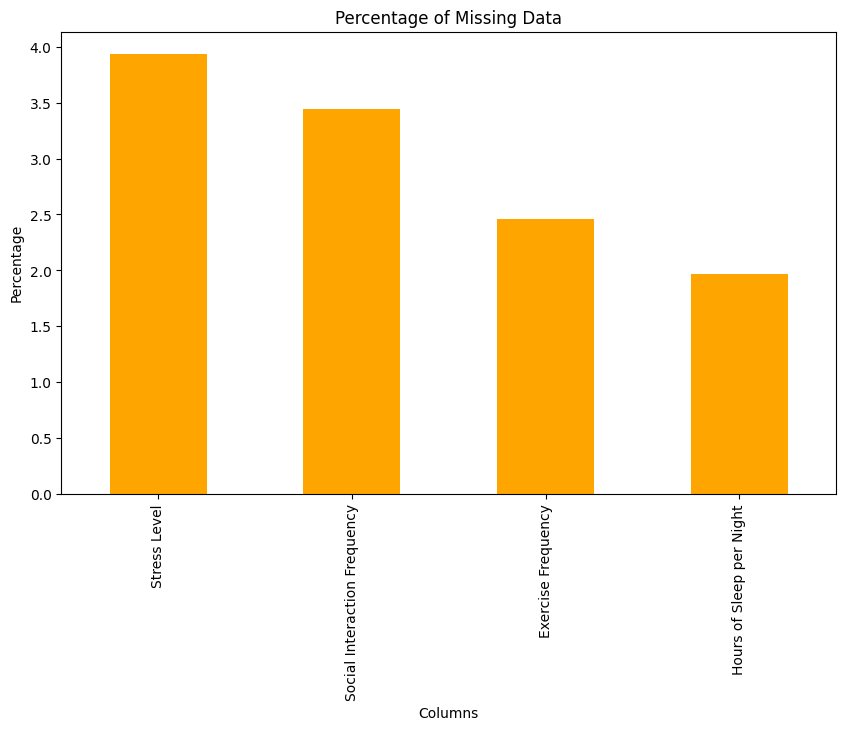

In [39]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

we have some missin values in stress level, social interaction frequency, excercise frequency and hours of sleep per night column. we will fill them in next section.

In [40]:
df.nunique()

Timestamp                       160
Age                              41
Gender                            3
Hours of Sleep per Night          7
Stress Level                      8
Exercise Frequency                5
Social Interaction Frequency      5
dtype: int64

# Data Preprocessing

## Dropping Timestamp and handling missing values

In [41]:
df.drop("Timestamp",axis=1,inplace=True)

Timestamp is redundant so dropping it

In [42]:
categorical_columns = ['Gender', 'Social Interaction Frequency']
ordinal_columns = ['Exercise Frequency']
numerical_columns = ['Age', 'Stress Level', 'Hours of Sleep per Night']

# Impute categorical columns with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute ordinal columns with mode
for col in ordinal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical columns based on specified strategies
for col in numerical_columns:
    if col == 'Stress Level':  # Use mean for Stress Level
        df[col].fillna(round(df[col].mean()), inplace=True)
    else:  # Use median for other numerical columns
        df[col].fillna(df[col].median(), inplace=True)

# Check for missing values after imputation
print(df.isnull().sum())


Age                             0
Gender                          0
Hours of Sleep per Night        0
Stress Level                    0
Exercise Frequency              0
Social Interaction Frequency    0
dtype: int64


Missing datas are being filled up by imputed values.

In [43]:
def determine_mental_health(row):
    sleep = row['Hours of Sleep per Night']
    exercise = row['Exercise Frequency']
    social_interaction = row['Social Interaction Frequency']
    
    if sleep > 7 and exercise > 3 and social_interaction >= 3:
        return 'Good'
    elif 5 <= sleep <= 7 and 1 <= exercise <= 3 and social_interaction == 2:
        return 'Fair'
    else:
        return 'Poor'

# Apply the function to each row in the DataFrame
df['Mental Health Status'] = df.apply(determine_mental_health, axis=1)


calculating the mental heath status column by the formula provided in the question.

In [44]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 6
Number of duplicate rows: 0


Dropping the duplicate columns.

In [45]:
df.head()

,Age,Gender,Hours of Sleep per Night,Stress Level,Exercise Frequency,Social Interaction Frequency,Mental Health Status
0,25,Male,6.0,4.0,3.0,3.0,Poor
1,25,Male,6.0,7.0,2.0,3.0,Poor
2,24,Male,8.0,3.0,0.0,2.0,Poor
3,25,Male,6.0,3.0,3.0,4.0,Poor
4,25,Male,5.0,8.0,0.0,2.0,Poor


In [46]:
df["Mental Health Status"].value_counts()

Mental Health Status
Poor    141
Fair     45
Good     11
Name: count, dtype: int64

In [47]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 202
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           197 non-null    int64  
 1   gender                        197 non-null    object 
 2   hours_of_sleep_per_night      197 non-null    float64
 3   stress_level                  197 non-null    float64
 4   exercise_frequency            197 non-null    float64
 5   social_interaction_frequency  197 non-null    float64
 6   mental_health_status          197 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 12.3+ KB


# Univariate analysis

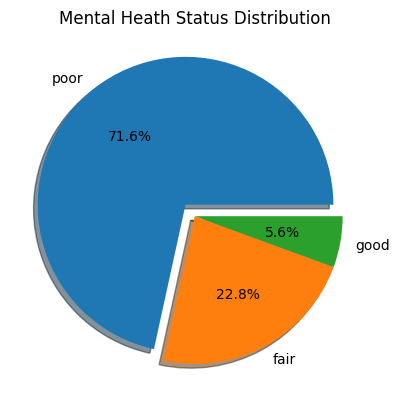

In [48]:
#heath status analysis
mental_health_count= df['mental_health_status'].value_counts()
plt.pie(mental_health_count.values,labels= ["poor","fair","good"],explode=(0.1,0,0),autopct="%.1f%%",shadow=True)
plt.title('Mental Heath Status Distribution')
plt.show()


It is a matter of regret that most of the people existing in the dataset have poor mental health status(71.6%). Least amount of people have good mental health status(5.6%).

In [49]:
# Age Distribution
fig = px.histogram(df, x='age', title='Age Distribution', nbins=5, color='mental_health_status', histnorm='percent')
fig.update_layout(bargap=0.1)
fig.show()

Most of the people of dataset are in the age group of 20-29 and 30-39 years. in 10-19 age group everyone has poor mental health. In 20-29 age group 36.36% of the people who are of good mental health exists but the number is too low. Most of the peopple here are of poor mental health which contributes to the 62.41% of total poor mental health people. There is almost 57.77% of the people who are of fair mental health belongs here. IN age 30-39 group 63.33% of the people have good mental health which is the highest in this age group. 23.40% of the people have poor mental health here. 33.33% of the people have fair mental health here. In age group 40+ there are no people with good mental health. 
- Note: here all percentages are relative i.e. percentages are calculated based on total number of people in that mental heath status category.

In [50]:
# Stress Level Distribution
fig = px.histogram(df, x='stress_level', title='Stress Level Distribution', nbins=10, color='mental_health_status', histnorm='percent')
fig.update_layout(bargap=0.1)
fig.show()

Most of the people who are of good mental health belongs to lower stress level groups specially in level 3,4,2,6(exceptional) respectively. If stress level is too much high then there can't generally exist good mental health or even fair mental heath. also most of the people who are of poor mental health belongs to higher stress level groups specially in level 4,5,6 7 respectively.

In [51]:
# Sleep Hours Distribution
fig = px.histogram(df, x='hours_of_sleep_per_night', title='Hours of Sleep per Night Distribution', nbins=10, color='mental_health_status', histnorm='percent')
fig.update_layout(bargap=0.1)
fig.show()


It is a clear insight from here is that people who are of good mental health are sleeping for more hours than people who are of poor mental health. People who are of good mental health are sleeping for 8 hours per night and people who are of poor mental health are sleeping for less than 8 hours per night. but the distinguisthment between poor and average mental health is a very tricky here as no specific pattern is seen.

In [52]:
# Pie chart for Gender distribution
fig = px.pie(df, names='gender', title='Gender Distribution')
fig.show()


The gender distribution across dataset is not uniform. It is clear that there are more males than females in the dataset with the minority of other groups.

In [53]:
# Pie chart for Exercise Frequency
fig = px.pie(df, names='exercise_frequency', title='Exercise Frequency Distribution')
fig.show()


it is seen that there are very less amount of people who dont do any kinds of excersise at all(5.58%). nand i  general people do excersise sometimes(2nd highest),often(highest) or daily.

# Bivariate Analysis

In [54]:
#Gender vs Mental Health Status
fig = px.bar(df, x='mental_health_status', color='gender', barmode='group',
             title='Mental Health Status Distribution by Gender', 
             labels={'mental_health_status': 'Mental Health Status', 'count': 'Count'})
fig.show()


it is seen that males are most depressed in general and females have more tendency to be of fair mental health status. In otheres category the amount of poor and fair mental health status are almost same. and it is clear that good mental health is less in all classes

In [55]:
#Stress Level vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='stress_level', title='Stress Level by Mental Health Status', color='mental_health_status')
fig.show()


It is clearly seen that stress level in good mental health status is less and in poor and mental health status is more. In good the median is 3 and in fair and poor the median is 5 but in case of poor mental health the range of data is too much varied from 2 to 9 stress level. but in case of fair mental health status the range is from 4 to 7.

In [56]:
#Sleep Hours vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='hours_of_sleep_per_night', title='Sleep Hours by Mental Health Status', color='mental_health_status')
fig.show()


sleep is a confusing indicator here. People who sleep 8 hours carry good mental health but people who sleep 6 hours in average have fair mental health and people who sleep 7 hour in average have poor mental health. it is not a clear indicator of mental health.

In [57]:
#Exercise Frequency vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='exercise_frequency', title='Exercise Frequency by Mental Health Status',color='mental_health_status')
fig.show()


people who excercise daily have good mental health but it is also confusing in case of poor and fair mental health status. both categories have people who sometimes excersises in average but the range of values in poor is more wide then the fair category.

In [58]:
#Social Interaction Frequency vs Mental Health Status
fig = px.box(df, x='mental_health_status', y='social_interaction_frequency', 
             title='Social Interaction Frequency by Mental Health Status', color='mental_health_status')
fig.show()


the people who have regular or often might have good mental health but its also true for poor as the poor class has a median of 3 which indicates to often excercise. the fair class is fixed in 2 which indicates to sometimes excercise.

In [59]:
# Stress level by age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 100], labels=["20-30", "30-40", "40-50", "50-60", "60+"], right=False)

# Boxplot for Stress Level by Age Group
fig = px.box(df, x='age_group', y='stress_level', title='Stress Level by Age Group')
fig.show()


all age groups have median in stress level of 5 but the range of values differ from each other but the range of values are most wide in 20-40 age gorups.

# Multivariate Analysis

In [60]:
# Stress Level by Gender and Mental Health Status
fig = px.box(df, x='gender', y='stress_level', color='mental_health_status',
             title='Stress Level by Gender and Mental Health Status', 
             labels={'gender': 'Gender', 'stress_level': 'Stress Level'})
fig.show()

in general people with less stess levels are with good mental health.

## Label Encoding

In [64]:
label_encoder = LabelEncoder() 
df_label=df
onehot_columns = ['gender']
ohe = OneHotEncoder(sparse_output=False, drop=None)
encoded_ohe = ohe.fit_transform(df_label[onehot_columns])
ohe_columns = ohe.get_feature_names_out(onehot_columns)
ohe_df = pd.DataFrame(encoded_ohe, columns=ohe_columns, index=df_label.index)
df_label = df_label.drop(columns=onehot_columns)
df_label = pd.concat([df_label, ohe_df], axis=1)
df_label.drop("gender_Other",axis=1,inplace=True)
df_label["mental_health_status"]= label_encoder.fit_transform(df["mental_health_status"])

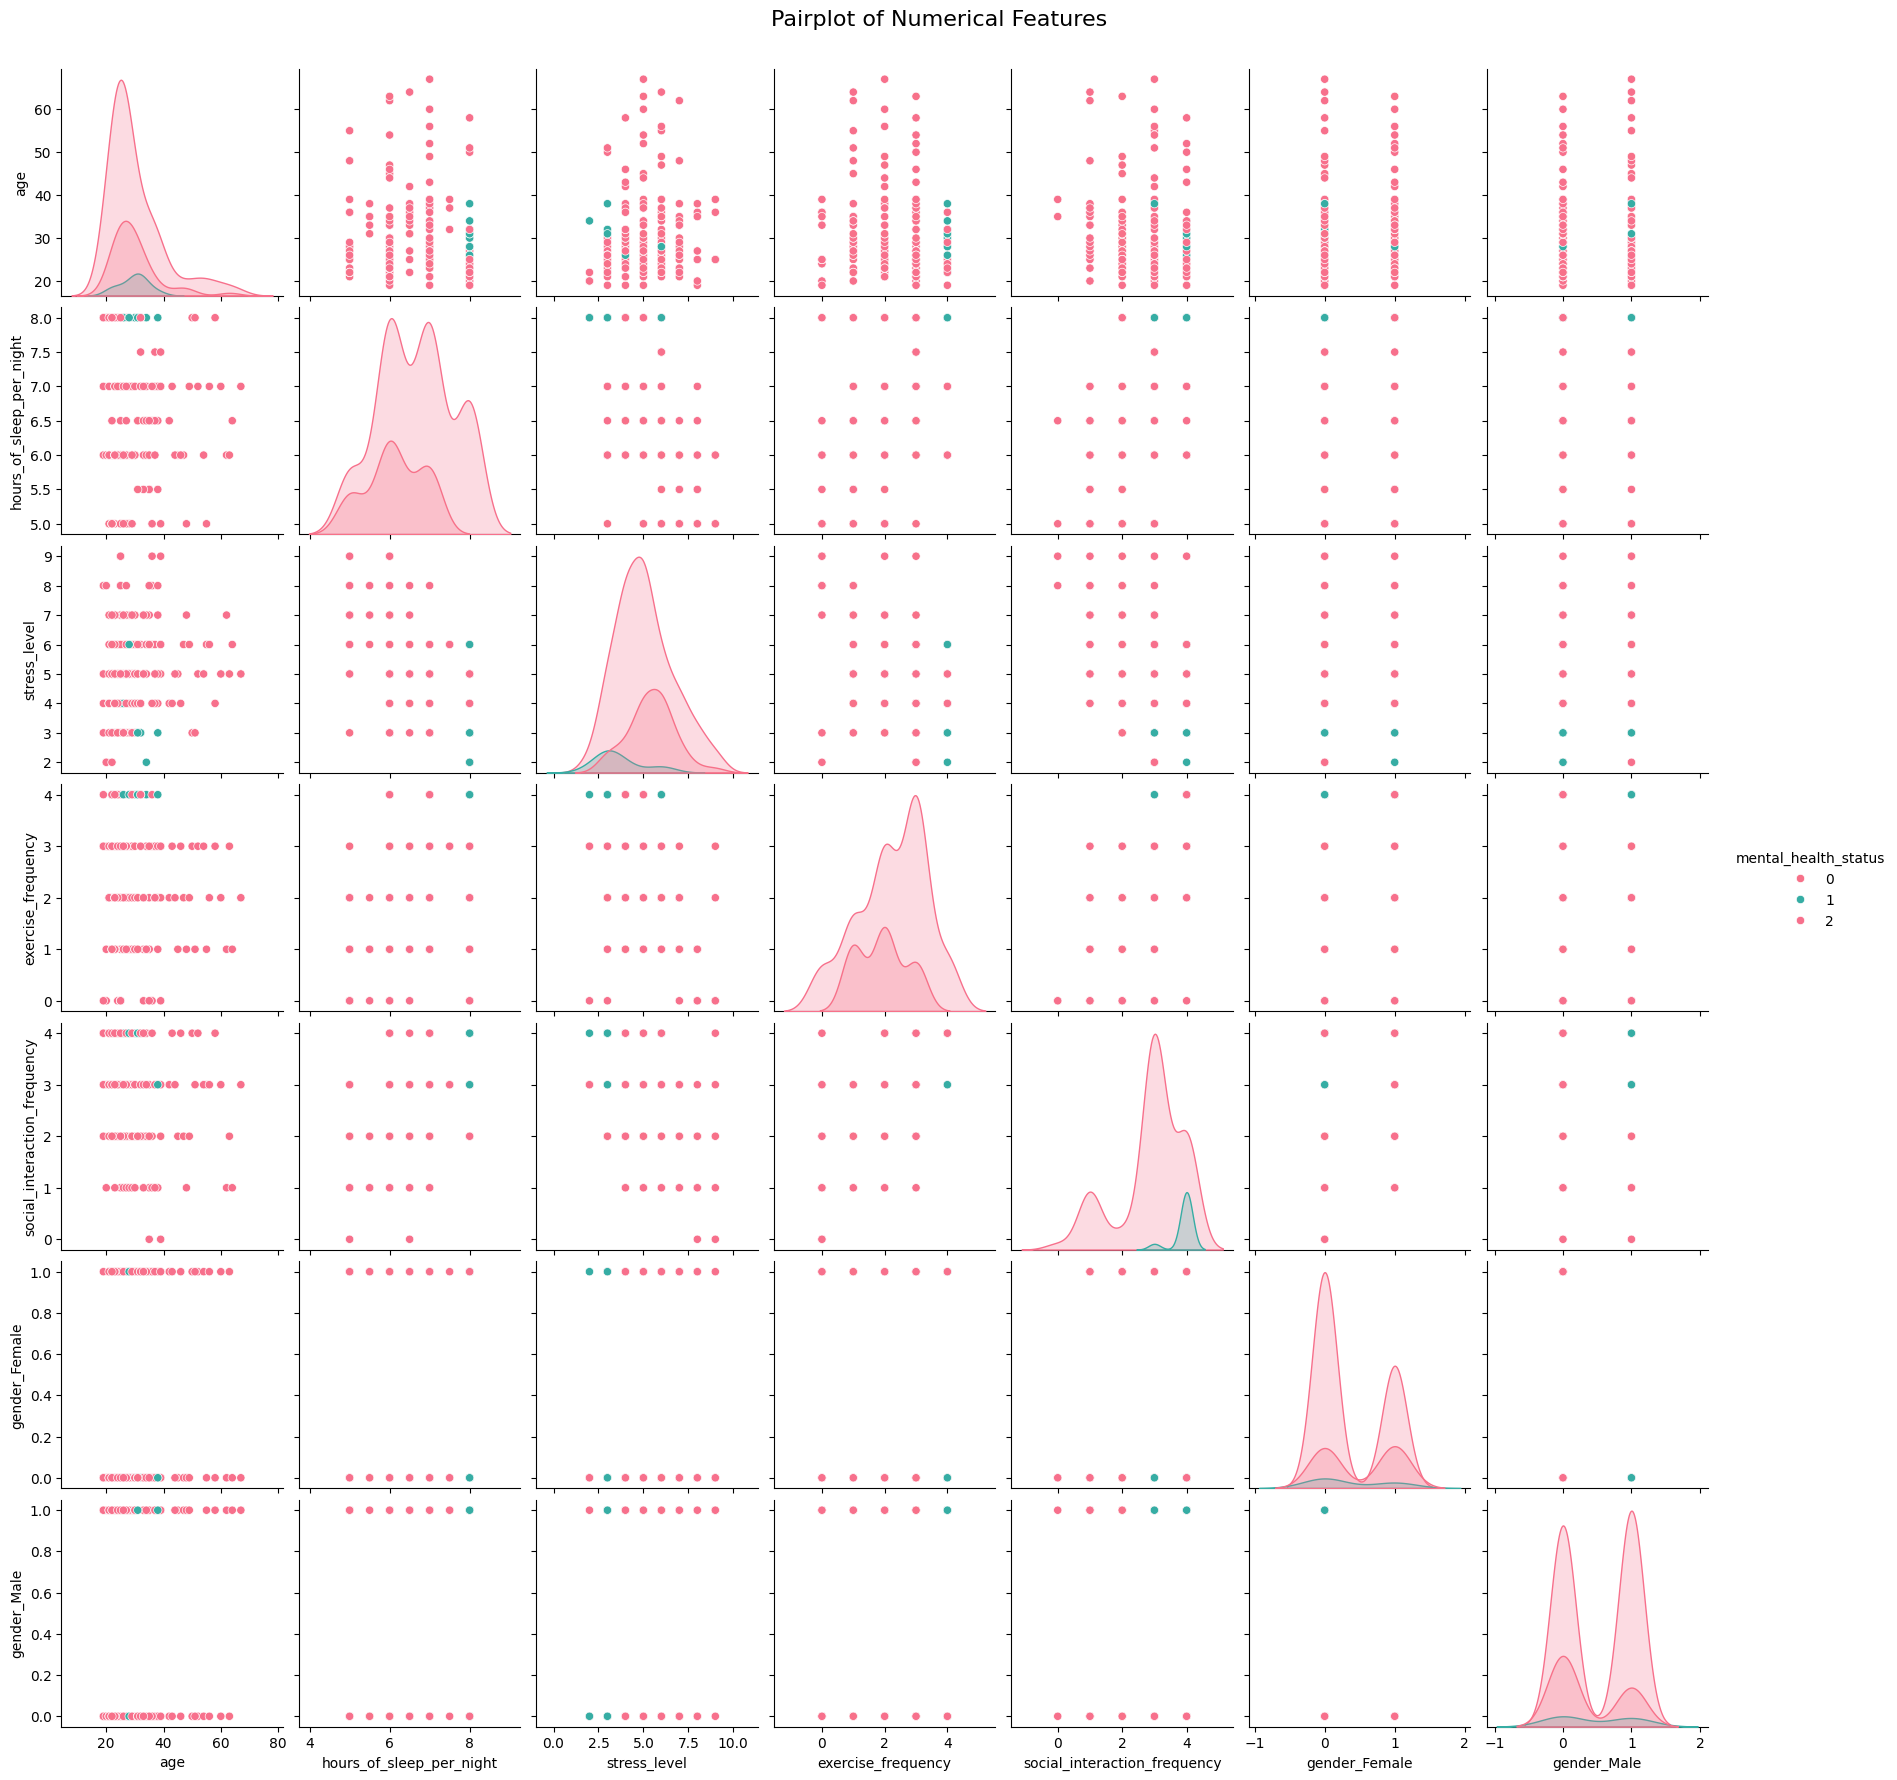

In [65]:
#pairplot
sns.pairplot(df_label, hue='mental_health_status', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

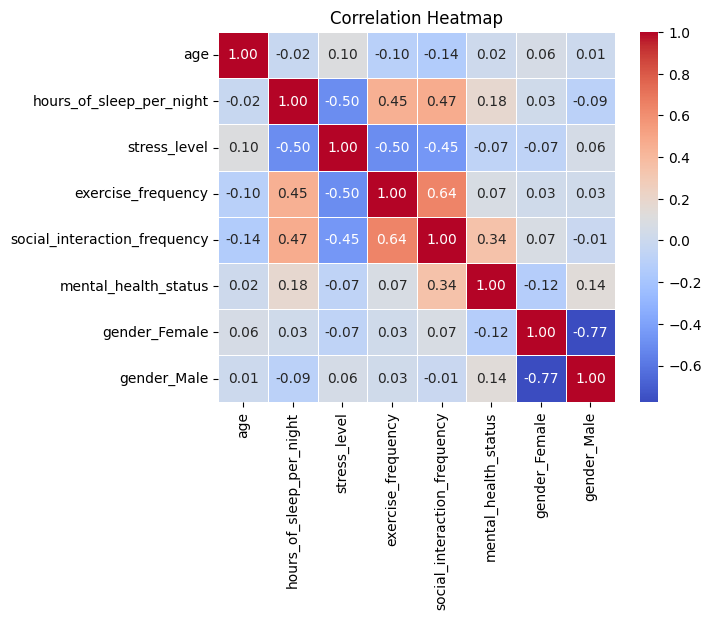

In [66]:
df_label.drop("age_group", axis=1, inplace=True)
sns.heatmap(df_label.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Strong Positive Correlation: social interaction and mental health status
- moderate positive correlation: hours of sleep at night and mental health status
- other relations with mental health status are not that much significant
- several multicolinearity issues exist here : Hours of sleep per night and exercise frequency, Hours of sleep per night and social interaction, excersise and social interaction, excercise and stress level, social interaction and stress level. 

In [84]:
# Violin plot for Stress Level by Mental Health Status
fig = px.violin(df, x='mental_health_status', y='stress_level', box=True, title='Stress Level by Mental Health Status')
fig.show()


In [87]:
# Violin plot for Sleep Hours by Mental Health Status
fig = px.violin(df, x='mental_health_status', y='hours_of_sleep_per_night', box=True,title='Sleep Hours by Mental Health Status')
fig.show()

The end